**1.)** Load the dataset and preprocess the data:
- Set your random seed to 42.
- Split the data into training, validation and test sets (60% , 20% , 20% ).
- As the data ranges vary significantly across the feature dimensions, you should scale your features. Scale them linearly within the 0-1 range. Be careful not to include the test data when scaling. You can use StandartScaler for that.

In [ ]:
import pandas as pd
import warnings


df = pd.read_csv("titanicdata.csv", encoding="utf-8")

In [ ]:
df.head(5)

,Survived,Pclass,Sex,Age
0,0,3,2,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,2,35.0


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


random_seed = 42

# We will predict the column='Survived'. That's why, we will drop it from the training data.
X = df.drop(columns=['Survived'])
y = df['Survived']

# train test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6, random_state=random_seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_seed)

In [ ]:
# Checking the number of rows
print("Row count of dataset:", len(df))

Row count of dataset: 891


In [ ]:
# Be sure that they are splitted correctly

print("Train data = ", X_train.shape, y_train.shape)
print("Test data = ", X_test.shape, y_test.shape)
print("Validation data = ", X_val.shape, y_val.shape)

Train data =  (534, 3) (534,)
Test data =  (179, 3) (179,)
Validation data =  (178, 3) (178,)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# This is better than StandardScaler and it is also advised.
scaler = MinMaxScaler()

# We do not scale the target variables y_train, y_val, y_test

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.fit_transform(X_val)

In [ ]:
# See the details, checking if they are scaled correctly

print("X_train:\n\n", X_train[0:5], "\n")
print("-------------------------\n")
print("X_test:\n\n",X_test[0:5], "\n")
print("-------------------------\n")
print("X_val:\n\n",X_val[0:5])

X_train:

 [[0.5        1.         0.77381252]
 [1.         1.         0.09525006]
 [1.         1.         0.39683338]
 [1.         0.         0.24604172]
 [0.5        0.         0.34656949]] 

-------------------------

X_test:

 [[1.         1.         0.22090978]
 [1.         1.         0.36792055]
 [1.         1.         0.50364413]
 [1.         0.         0.3842674 ]
 [0.5        1.         0.39683338]] 

-------------------------

X_val:

 [[0.         0.         0.41141681]
 [0.         1.         0.63659684]
 [1.         1.         0.41141681]
 [0.5        0.         0.33019809]
 [0.5        1.         0.50121134]]


**2.)** Implement the logistic regression model:
- Initialize the model parameters w.

- Implement the sigmoid function, σ(z) = 1 / (1+e^(-z)) , where z is the linear combination of the input features and the model parameters w.

- Implement the cost function.

- Implement the gradient descent algorithm to minimize the cost function, updating the parameters.

In [ ]:
import numpy as np

num_features = X_train.shape[1]

# Randomly creating weights.
weights = np.random.randn(num_features)

print("The weights are:", weights) # In here, I am just checking how does np.random.rand creates the array.

The weights are: [-0.19512711  0.14803253  1.14116781]


In [ ]:
# Implementing the sigmoid function

def sigmoid(z):

  # Formula: 1 / (1 + e^-z)


  return 1 / (1 + np.exp(-z))

In [ ]:
# Implementing the cost function

def cost_function(y_true, x_true, weights):

  m = len(y_true)  # Number of samples


  z = np.dot(x_true, weights) # we could write this using matmul too. Nothing changes

  # Computing the logistic regression
  sigmoid_z = sigmoid(z)

  # Computing the cost
  cost = - (1/m) * np.sum(y_true * np.log(sigmoid_z) + (1 - y_true) * np.log(1 - sigmoid_z))

  return cost

In [ ]:
# Checking the cost function if it works as expected
cost_function(y_train, X_train, weights)

0.7789168459801419

In [ ]:
# Finding gradient
def find_gradient(y_true, x_true, weights):
  m = y_true.shape[0]
  z = np.dot(x_true, weights)
  sigmoid_z = sigmoid(z)
  gradient = (1/m) * np.dot(x_true.T, (sigmoid_z - y_true))
  return gradient

In [ ]:
# Checking if find_gradient works as expected
find_gradient(y_train, X_train, weights)

array([0.19571817, 0.27897693, 0.09334434])

In [ ]:
# Implementing the gradient descent
def gradient_descent(y_true, x_true, learning_rate, weights):

  gradient = find_gradient(y_true, x_true, weights)
  weights = weights - learning_rate * gradient
  return weights

In [ ]:
# Checking if gradient_descent works as expected
gradient_descent(y_train, X_train, 0 ,weights)

array([-0.19512711,  0.14803253,  1.14116781])

**3.)** Set the step size to 0.1. Train your model using the training data. Calculate the loss on the validation
data. Plot both the training and validation losses across 100 iterations.

In [ ]:
# Setting the step size
step_size = 0.1

num_features = X_train.shape[1]
weights = np.random.randn(num_features, 1) # Randomly assign weights
y_train = np.array(y_train).reshape(-1, 1)
y_val = np.array(y_val).reshape(-1, 1)

training_loss_array = []
validation_loss_array = []


validation_data_loss = cost_function(y_val, X_val, weights) # Find validation cost for randomly assigned weights

# In each iteration, add the validation loss and training loss to the arrays
for i in range(100):
  weights = gradient_descent(y_train, X_train, step_size, weights)

  training_loss = cost_function(y_train, X_train, weights)
  training_loss_array.append(training_loss)

  validation_loss = cost_function(y_val, X_val, weights)
  validation_loss_array.append(validation_loss)


In [ ]:
# Validation loss without any gradient descent
print("Validation data loss without gradient descent is", validation_data_loss)

Validation data loss without gradient descent is 0.6413501717530481


Text(0, 0.5, 'Loss')

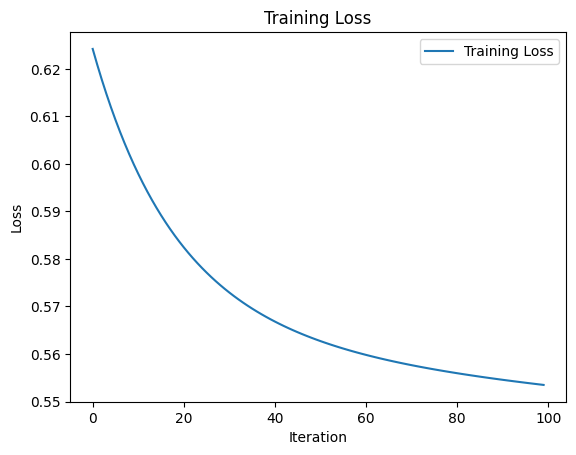

In [ ]:
plt.title("Training Loss")
plt.plot(training_loss_array, label="Training Loss")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss")

In [ ]:
# Validation loss with gradient descent
print("Validation data loss with gradient descent is", training_loss_array[-1])

Validation data loss with gradient descent is 0.5534924737658858


Text(0, 0.5, 'Loss')

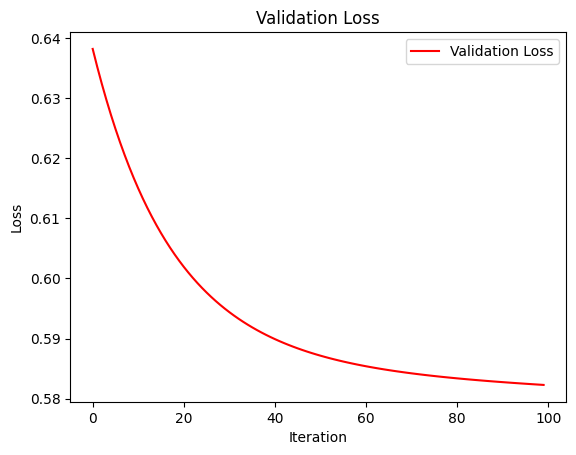

In [ ]:
plt.title("Validation Loss")
plt.plot(validation_loss_array, label="Validation Loss", color="red")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss")

**4.)** Now vary your step size and number of iterations, and calculate the validation loss in each case. Pick
the one that gives you the best loss. Plot the loss curve across different iterations for the chosen values
of these hyperparameters.

In [ ]:
initial_weights = np.random.randn(num_features, 1) # Again randomly assigning weights

# I picked these numbers for iteration and step size
step_size_array = [0.01, 0.1, 1, 10, 100, 1000]
iteration_array = [100, 500, 1000, 10000]


# In this function, it stores the values, in validation_losses[-1] it retuns the last iteration.
def find_best_values(X_train, y_train, X_val, y_val, initial_weights, learning_rate, num_iterations):
    weights = np.copy(initial_weights)  # Start with the initial weights for each run

    validation_losses = []

    for i in range(num_iterations):
        weights = gradient_descent(y_train, X_train, learning_rate, weights)
        val_loss = cost_function(y_val, X_val, weights)
        validation_losses.append(val_loss)

    return validation_losses[-1], validation_losses

results = {} # Initializing a dictionary for results

# Starting numbers to find best hyperparameters
best_loss = 100
best_learning_rate = -85
best_iteration = -85
best_loss_curve = []


for lr in step_size_array:
    for num_iter in iteration_array:
        final_loss, all_losses = find_best_values(X_train, y_train, X_val, y_val, initial_weights, lr, num_iter) # Find values for each step size and iteration
        results[(lr, num_iter)] = final_loss # Store the value in dictionary

        # Finding the best parameters
        if final_loss < best_loss:
            best_loss = final_loss
            best_learning_rate = lr
            best_iteration = num_iter
            best_loss_curve = all_losses

# The best validation loss wil be printed here
warnings.filterwarnings('ignore', category=RuntimeWarning)
print(f"Best Learning Rate: {best_learning_rate}, Best Iterations: {best_iteration}, Best Validation Loss: {best_loss}")



Best Learning Rate: 0.01, Best Iterations: 10000, Best Validation Loss: 0.5767676946307794


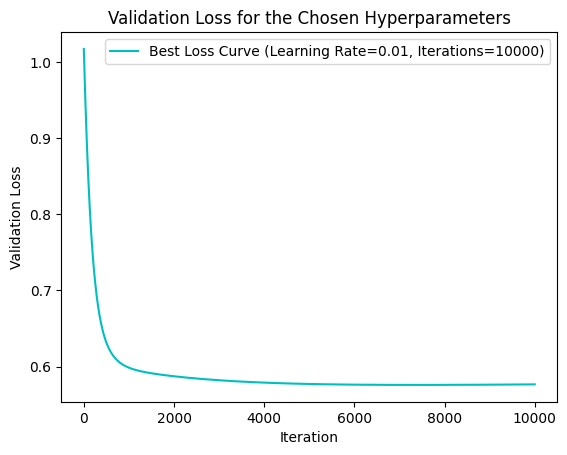

In [ ]:
# Validation Loss graph using the best hyperparameters
plt.plot(best_loss_curve, label=f'Best Loss Curve (Learning Rate={best_learning_rate}, Iterations={best_iteration})', color="c")
#plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Validation Loss')
plt.title("Validation Loss for the Chosen Hyperparameters")
plt.legend()
plt.show()

**5.)** Combine the validation and training data and retrain the final model with the chosen hyperparameters.

In [ ]:
# Combining train and validation data
X_train = np.concatenate([X_train, X_val])
y_train = np.concatenate([y_train, y_val])

In [ ]:
# Checking if they concatenated as expected
print("Train data = ", X_train.shape, y_train.shape)
print("Test data = ", X_test.shape, y_test.shape)
print("Validation data = ", X_val.shape, y_val.shape)

Train data =  (712, 3) (712, 1)
Test data =  (179, 3) (179,)
Validation data =  (178, 3) (178, 1)


**6.)** Evaluate the accuracy of your model on the testing data and report the results.

In [ ]:

from sklearn.metrics import accuracy_score
weights = np.random.randn(num_features, 1)

# We are using the best hyperparameters that we chose above
for i in range(best_iteration):
  weights = gradient_descent(y_train, X_train, best_learning_rate, weights)


# Predicting result
def predict_result(xxx, weights):
  res = np.dot(xxx, weights)
  probs = sigmoid(res)

  return [1 if i > 0.5 else 0 for i in probs]


y_prediction = predict_result(X_test, weights)


acc_score = accuracy_score(y_test, y_prediction)


print("Accuracy is", acc_score)


Accuracy is 0.7877094972067039
